In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('market_data1.csv')

In [22]:
len(df)

461484

In [21]:
df.head(10)

,Time,Instrument,Operation,OrderId,Side,Volume,Price,Lifespan
0,0.0,0,Insert,177349435,B,1000.0,1469.0,G
1,0.0,0,Insert,177349439,A,8000.0,1470.0,G
2,0.0,0,Insert,177349467,A,3000.0,1472.0,G
3,0.0,0,Insert,177349475,A,2000.0,1471.0,G
4,0.0,0,Insert,177349487,A,2000.0,1816.0,G
5,0.0,0,Cancel,177349435,NaN,NaN,NaN,G
6,0.0,0,Insert,177349499,B,1000.0,1469.0,G
7,0.0,0,Insert,177349503,A,1000.0,1470.0,G
8,0.0,0,Cancel,177349467,NaN,NaN,NaN,G
9,0.0,0,Cancel,177349499,NaN,NaN,NaN,G


In [ ]:
def simulate_orderbook(df):
    

In [20]:
[np.unique(df[col]) for col in ['Instrument', 'Operation']]

[array([0, 1]), array(['Amend', 'Cancel', 'Insert'], dtype=object)]

In [23]:
df[df['Operation'] == 'Amend']

,Time,Instrument,Operation,OrderId,Side,Volume,Price,Lifespan
2318,5.483298,0,Amend,177490955,NaN,-1000.0,NaN,G
8756,17.529436,0,Amend,177827279,NaN,-1000.0,NaN,G
12152,23.291846,0,Amend,177970843,NaN,-20000.0,NaN,G
15706,29.474572,0,Amend,178121187,NaN,-20000.0,NaN,G
16451,31.080238,0,Amend,178354139,NaN,-20000.0,NaN,G
...,...,...,...,...,...,...,...,...
450596,872.495706,0,Amend,204462787,NaN,-20000.0,NaN,G
452096,875.060779,0,Amend,204588539,NaN,-20000.0,NaN,G
454195,880.043257,0,Amend,202608203,NaN,-20000.0,NaN,G
459599,894.573871,0,Amend,205063587,NaN,-20000.0,NaN,G


In [128]:
timeintervals = np.linspace(0, 900, 45001)
df['Time_d'] = pd.cut(df['Time'],bins=timeintervals,labels=timeintervals[:-1])
df.loc[df['Time'] == 0, 'Time_d'] = 0

In [125]:
df

,Time,Instrument,Operation,OrderId,Side,Volume,Price,Lifespan,Time_d
0,0.000000,0,Insert,177349435,B,1000.0,1469.0,G,0.00
1,0.000000,0,Insert,177349439,A,8000.0,1470.0,G,0.00
2,0.000000,0,Insert,177349467,A,3000.0,1472.0,G,0.00
3,0.000000,0,Insert,177349475,A,2000.0,1471.0,G,0.00
4,0.000000,0,Insert,177349487,A,2000.0,1816.0,G,0.00
...,...,...,...,...,...,...,...,...,...
461479,899.901512,1,Insert,7034062,A,10000.0,1522.0,G,899.90
461480,899.901512,1,Insert,7034063,B,10000.0,1510.0,G,899.90
461481,899.902420,0,Insert,205198743,B,1000.0,1501.0,G,899.90
461482,899.955806,0,Insert,205199427,A,1000.0,1533.0,G,899.94


Task 1: clean the market data into a time-series of tradable order-book format. This will be used for backtest and estimation.

In [129]:
# observe that some orders are inserted and cancelled literally at the same time.
# These should all be removed

orderid = []
grouped = df.groupby('Time_d')

for time, group in grouped:
    insertid = set(group[group['Operation'] == 'Insert'].OrderId)
    cancelid = set(group[group['Operation'] == 'Cancel'].OrderId)
    intersection = insertid.intersection(cancelid)
    for id in intersection:
        orderid.append(id)

# delete all rows with these orderid
df = df[~df['OrderId'].isin(orderid)]


In [130]:
df

,Time,Instrument,Operation,OrderId,Side,Volume,Price,Lifespan,Time_d
11,0.000000,0,Insert,177349767,A,1000.0,1520.0,G,0.00
20,0.000000,0,Insert,177351459,B,1000.0,1469.0,G,0.00
30,0.000000,0,Insert,177351591,A,1000.0,1471.0,G,0.00
41,0.000000,0,Insert,177351831,B,1000.0,1466.0,G,0.00
50,0.000000,0,Insert,177352015,B,1000.0,1469.0,G,0.00
...,...,...,...,...,...,...,...,...,...
461479,899.901512,1,Insert,7034062,A,10000.0,1522.0,G,899.90
461480,899.901512,1,Insert,7034063,B,10000.0,1510.0,G,899.90
461481,899.902420,0,Insert,205198743,B,1000.0,1501.0,G,899.90
461482,899.955806,0,Insert,205199427,A,1000.0,1533.0,G,899.94


Task 2: create time-series tradeable orderbook from the time-series trades

In [149]:
df_future = df[df['Instrument'] == 0]
df_etf = df[df['Instrument'] == 1]


In [152]:
currentbook = pd.DataFrame(columns=df_etf.columns)
etf_orderbook = pd.DataFrame(columns=df_etf.columns)

for time, group in df_etf.groupby('Time_d'):
    
    

In [151]:
currentbook

,Time,Instrument,Operation,OrderId,Side,Volume,Price,Lifespan,Time_d


<Axes: xlabel='Time_d'>

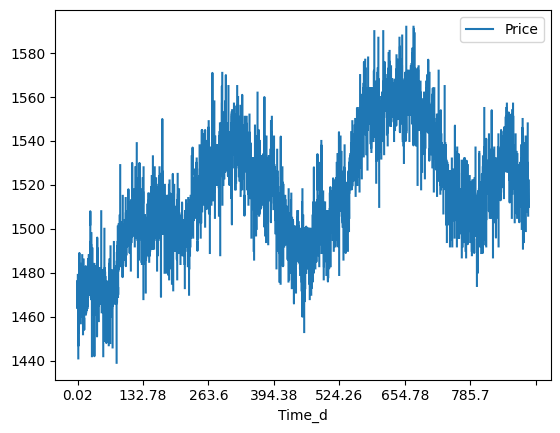

In [148]:
df_etf.plot(x='Time_d', y='Price', kind='line')

In [132]:
canceled = set(df[df['Operation'] == 'Cancel']['OrderId'])
inserted = set(df[df['Operation'] == 'Insert']['OrderId'])

In [141]:
len(df[df['Instrument']==1])

13782

In [73]:
df[df['Operation'] == 'Cancel']

,Time,Instrument,Operation,OrderId,Side,Volume,Price,Lifespan
103,0.152811,0,Cancel,177353423,NaN,NaN,NaN,G
105,0.152859,0,Cancel,177353443,NaN,NaN,NaN,G
107,0.152939,0,Cancel,177353451,NaN,NaN,NaN,G
109,0.152939,0,Cancel,177353359,NaN,NaN,NaN,G
111,0.153497,0,Cancel,177353455,NaN,NaN,NaN,G
...,...,...,...,...,...,...,...,...
461471,899.768459,0,Cancel,205196539,NaN,NaN,NaN,G
461474,899.795370,0,Cancel,205195355,NaN,NaN,NaN,G
461477,899.901512,1,Cancel,7034060,NaN,NaN,NaN,NaN
461478,899.901512,1,Cancel,7034061,NaN,NaN,NaN,NaN


In [60]:
df[df['Operation'] == 'Insert'].OrderId

0         177349435
1         177349439
2         177349467
3         177349475
4         177349487
            ...    
461476    205198055
461479      7034062
461480      7034063
461481    205198743
461482    205199427
Name: OrderId, Length: 234047, dtype: int64

In [56]:
# orderid = sorted(orderid)
print(orderid[:5])

[177351811, 177349767, 177351691, 177352591, 177353359]


In [44]:
df

,Time,Instrument,Operation,OrderId,Side,Volume,Price,Lifespan
0,0.000000,0,Insert,177349435,B,1000.0,1469.0,G
1,0.000000,0,Insert,177349439,A,8000.0,1470.0,G
2,0.000000,0,Insert,177349467,A,3000.0,1472.0,G
3,0.000000,0,Insert,177349475,A,2000.0,1471.0,G
4,0.000000,0,Insert,177349487,A,2000.0,1816.0,G
...,...,...,...,...,...,...,...,...
461479,899.901512,1,Insert,7034062,A,10000.0,1522.0,G
461480,899.901512,1,Insert,7034063,B,10000.0,1510.0,G
461481,899.902420,0,Insert,205198743,B,1000.0,1501.0,G
461482,899.955806,0,Insert,205199427,A,1000.0,1533.0,G


In [138]:
df1 = df[df['Lifespan'] == 'F']

In [139]:
df1

,Time,Instrument,Operation,OrderId,Side,Volume,Price,Lifespan,Time_d
457,0.971363,0,Insert,4042971,B,10.0,1471.0,F,0.96
913,2.000555,0,Insert,4043475,A,450.0,1470.0,F,2.00
914,2.000555,0,Insert,4043476,A,70.0,1470.0,F,2.00
920,2.000584,0,Insert,4043477,A,380.0,1470.0,F,2.00
1012,2.122693,0,Insert,4043559,A,500.0,1469.0,F,2.12
...,...,...,...,...,...,...,...,...,...
461143,899.200036,0,Insert,4644408,B,1000.0,1518.0,F,899.20
461144,899.200036,0,Insert,4644409,B,540.0,1518.0,F,899.20
461284,899.522933,0,Insert,4644479,A,440.0,1516.0,F,899.52
461286,899.523052,0,Insert,4644490,A,560.0,1516.0,F,899.52


In [47]:
if (df1['Operation']=='Insert').all():
    print('All insert')

All insert
